Objective of Project:
    1) Building a multiple classification model to see which model is having high accuracy
    2) To test the feature selection methods as all physiochemicals variables are relevant or not

Importing required libraries for this project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Loading the DataSet

In [2]:
df = pd.read_csv("winequality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


There are 1599 rows and 12 columns in the dataset and and data looks cleaned but still need to check missing values is exist or not.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As there is no missing values,data set is pretty cleaned and will check the dataset in a briefly way.

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We will see how the data is distributed in feature variables (X) and target variable (Y).

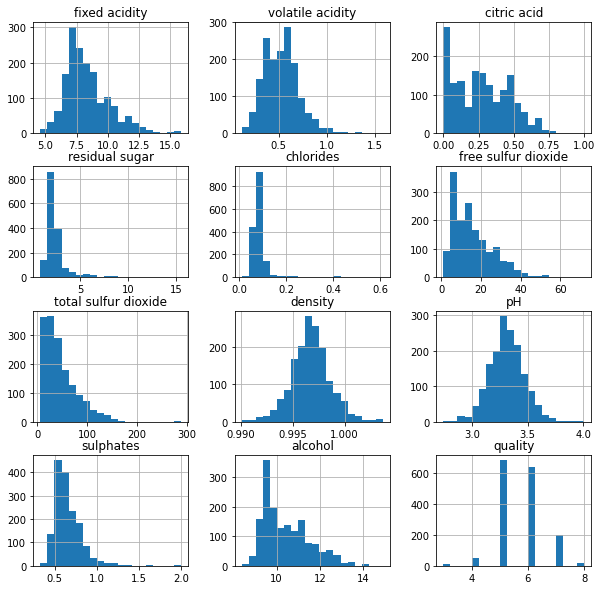

In [7]:
df.hist(bins = 20, figsize = (10,10))
plt.show()

Checking how the data is distributed or skewed.

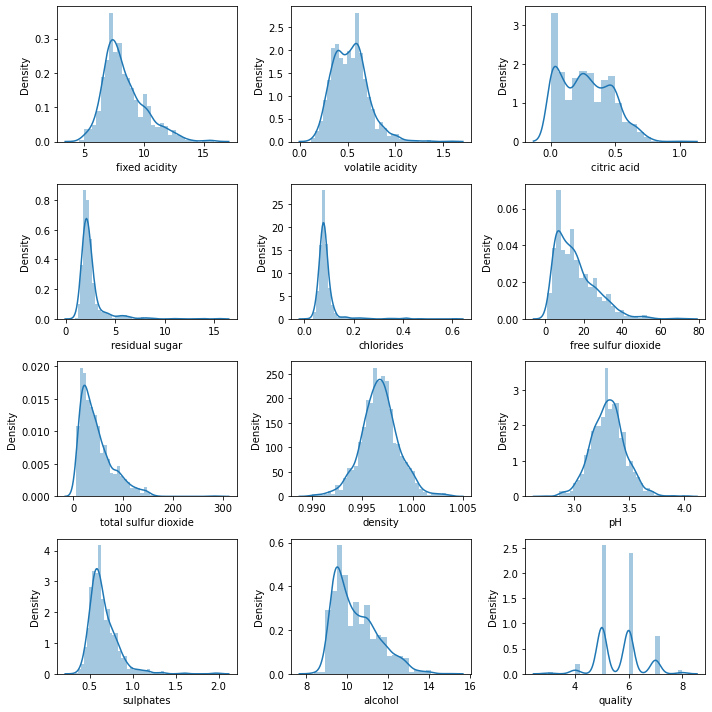

In [9]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df:
    if pltnumber<=12:
        ax = plt.subplot(4,3,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

using box plot,checking whether outliers exist or not and I can see that outliers exist on most variables.

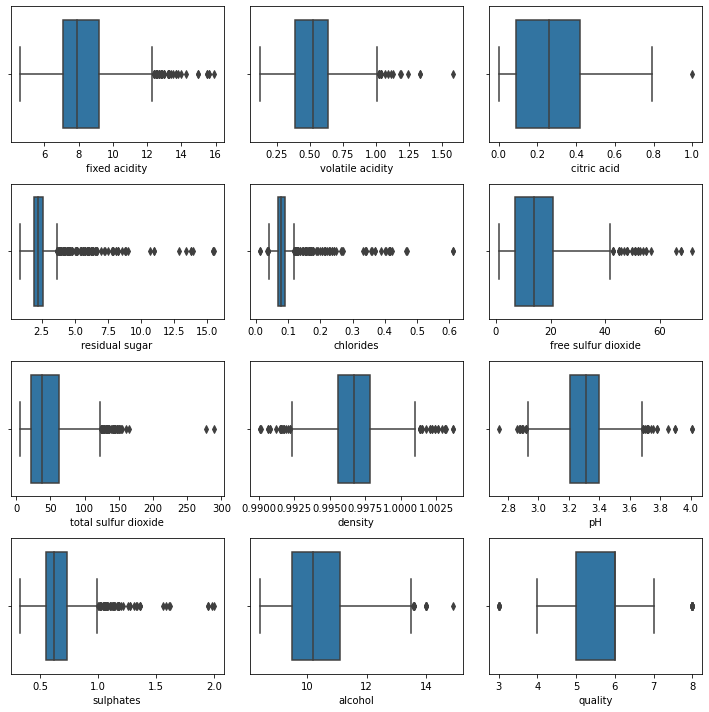

In [10]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df:
    if pltnumber<=12:
        ax = plt.subplot(4,3,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Applying outlier removal method - Z-Score Method to remove the outliers.

In [11]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshold = 3
df_new = df[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",df.shape)
print("shape after" .ljust(20),":",df_new.shape)
print("% loss" .ljust(20),":",((df.shape[0]-df_new.shape[0])/df.shape[0]))

shape before and after
shape before         : (1599, 12)
shape after          : (1451, 12)
% loss               : 0.09255784865540963


In [ ]:
The % loss of data is 9% after applying outlier.

We can see outlier has been removed and range of graph has been changed from the below graph.

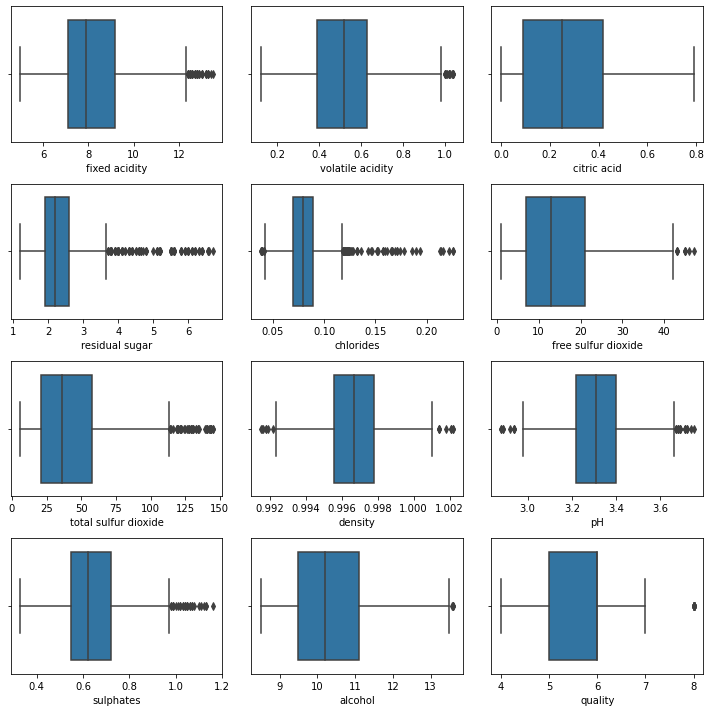

In [12]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new:
    if pltnumber<=12:
        ax = plt.subplot(4,3,pltnumber)
        sns.boxplot(df_new[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

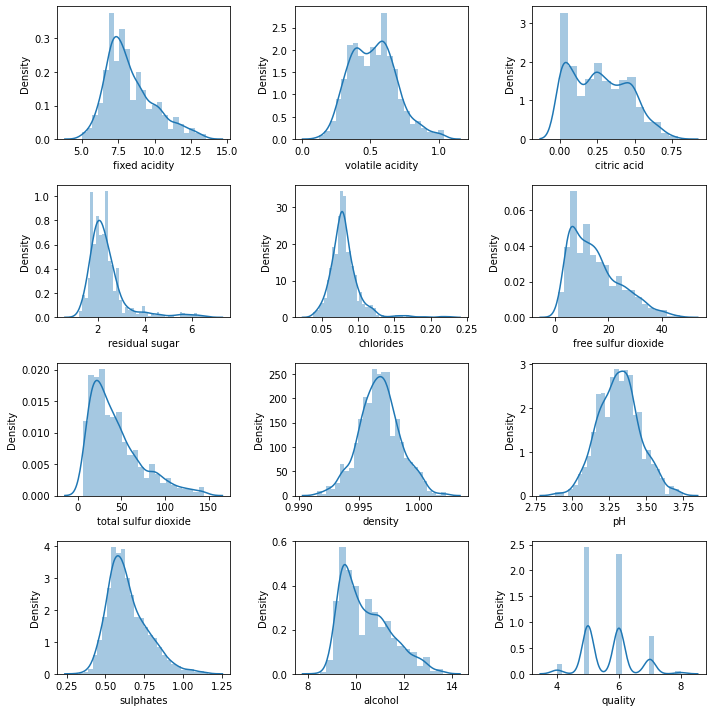

In [13]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new:
    if pltnumber<=12:
        ax = plt.subplot(4,3,pltnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Dropping the Y target variable , and see how the features distributed and any skewness exist in variables to remove if any but data looks normally distributed.

In [14]:
x = df_new.drop('quality', axis = 1)

As am going to build a model in classification,I need to convert the output variable  to binary output variable as 1 /0

In [15]:
df_new['quality'] = [1 if out >= 7 else 0 for out in df_new['quality']]

In [16]:
y = df_new['quality']

Next I want to see the correlation between variables through correlation table and for much understanding,I used Heat Map for easy visulaize and understanding.

In [17]:
corr_mat = df_new.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.125791
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.267836
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.227633
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.117036
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.112080
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.086402
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.172638
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.153031
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.079105
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.310432


As I can see some features are correlated to other variable but it's likely that these variables are important features to test the wine quality so we will check that later.

citric acid,density to fixed acidity
total sulfur di oxide to free sulfur di oxide

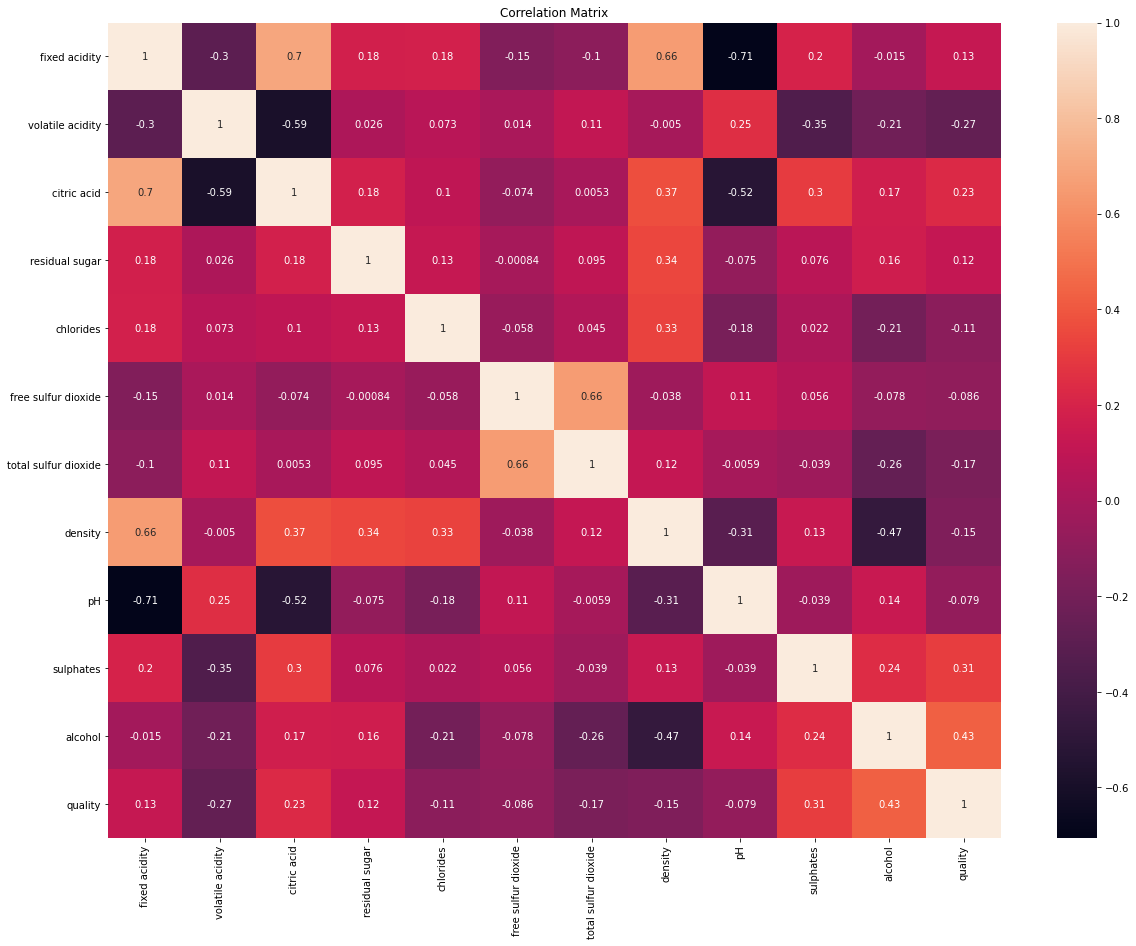

In [18]:
plt.figure(figsize= (20,15))
sns.heatmap(corr_mat, annot = True)
plt.title("Correlation Matrix")
plt.show()

Checking the counts of output variable and it seems to be imbalanced and we will confirm that by plot it by count plot.

In [19]:
y.value_counts()

0    1250
1     201
Name: quality, dtype: int64

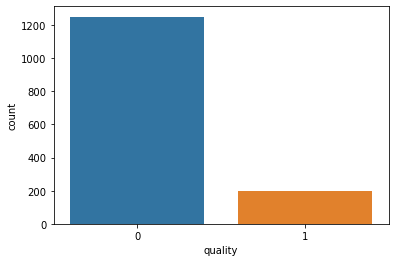

In [20]:
sns.countplot(df_new['quality'])
plt.show()

As it is confirmed ,the data is imbalanced and needs to be balanced by applying re-sampling technique.

In [21]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


Am using over sampling which means increasing the minority class to majority one and I am using SMOTE method for re-sample the output variable.

In [22]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

As you can see the output variables are balanced now,we will go ahead now and proceed with standardization and model building

In [23]:
y_over.value_counts()

1    1250
0    1250
Name: quality, dtype: int64

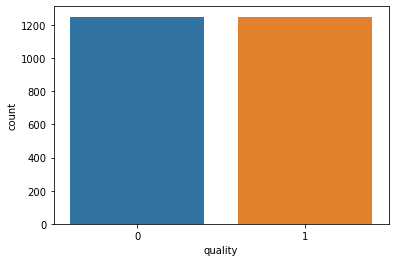

In [24]:
sns.countplot(y_over)
plt.show()

Before preparing the data for modelling,I am standardizing the data and it will convert the data into a standardize form in order to equalize the range of data

In [25]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x_over)

Splitting the data into train and test

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_sc, y_over, test_size = 0.25, random_state = 125)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1875, 11)
(1875,)
(625, 11)
(625,)


Model Building - I am building models on these algorithm -  1) support vector classifier 2) Decision tree classifier 3) Random forest Classifier 4) Ada boost classifier to compare the accuracy.

Model 1 : Support Vector Classifier

In [44]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.9008
Confusion Matrix 
 [[259  47]
 [ 15 304]]
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.85      0.89       306
           1       0.87      0.95      0.91       319

    accuracy                           0.90       625
   macro avg       0.91      0.90      0.90       625
weighted avg       0.90      0.90      0.90       625

ROC AUC Score 
 0.8996916425922511


Model 2 : Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.8992
Confusion Matrix 
 [[263  43]
 [ 20 299]]
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       306
           1       0.87      0.94      0.90       319

    accuracy                           0.90       625
   macro avg       0.90      0.90      0.90       625
weighted avg       0.90      0.90      0.90       625

ROC AUC Score 
 0.8983905997090582


Model 3 : Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.9232
Confusion Matrix 
 [[270  36]
 [ 12 307]]
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       306
           1       0.90      0.96      0.93       319

    accuracy                           0.92       625
   macro avg       0.93      0.92      0.92       625
weighted avg       0.93      0.92      0.92       625

ROC AUC Score 
 0.9223676931587682


Model 4 : Ada Boost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test,y_pred))
print("Classification Report \n", classification_report(y_test,y_pred))
print("ROC AUC Score \n", roc_auc_score(y_test,y_pred))

Accuracy score 
 0.864
Confusion Matrix 
 [[250  56]
 [ 29 290]]
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.82      0.85       306
           1       0.84      0.91      0.87       319

    accuracy                           0.86       625
   macro avg       0.87      0.86      0.86       625
weighted avg       0.87      0.86      0.86       625

ROC AUC Score 
 0.8630421865715984


ROC AUC curve for all models

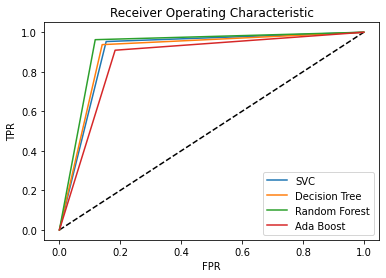

In [48]:
y_pred_prob1 = svm.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dt.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = rfc.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = abc.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "SVC")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "Random Forest")
plt.plot(fpr4, tpr4, label= "Ada Boost")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

We will look into feature importance method to test all physio checmicals variables are relevant and applying random forest classifier and ada boost classifier to check this.

alcohol                 0.274493
sulphates               0.159696
volatile acidity        0.096224
citric acid             0.088048
total sulfur dioxide    0.075212
density                 0.060900
fixed acidity           0.056189
chlorides               0.053742
residual sugar          0.051097
free sulfur dioxide     0.042945
pH                      0.041455
dtype: float64


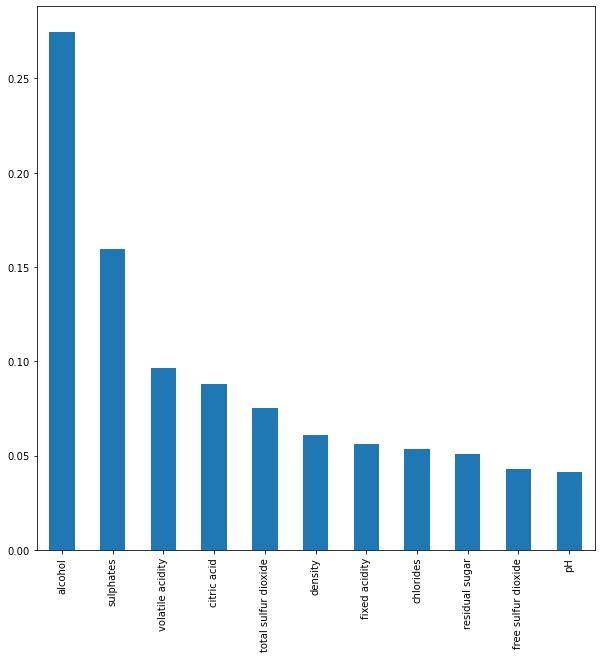

In [34]:
feat_imp = pd.Series(rfc.feature_importances_ , index = x.columns)
feat_imp.nlargest(15).plot(kind='bar',figsize=(10,10))
print(feat_imp.nlargest(15))

alcohol                 0.20
total sulfur dioxide    0.12
residual sugar          0.10
density                 0.10
sulphates               0.10
volatile acidity        0.08
citric acid             0.08
free sulfur dioxide     0.08
fixed acidity           0.06
chlorides               0.06
pH                      0.02
dtype: float64


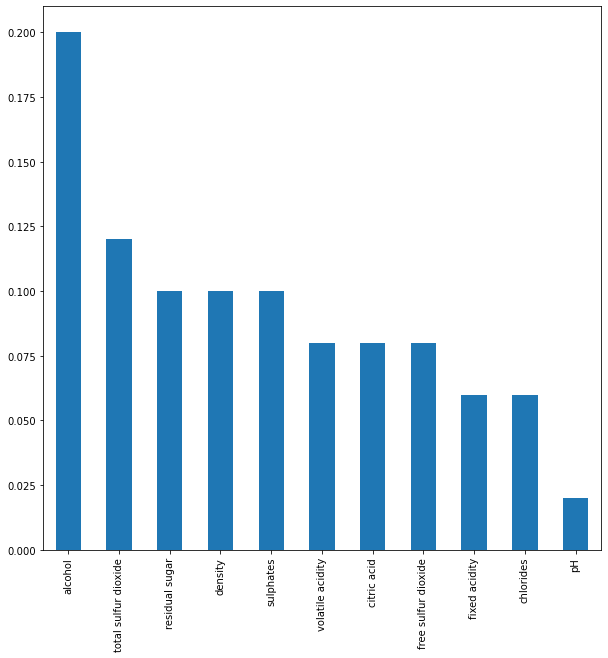

In [35]:
feat_imp_ada = pd.Series(abc.feature_importances_ , index = x.columns)
feat_imp_ada.nlargest(15).plot(kind='bar',figsize=(10,10))
print(feat_imp_ada.nlargest(15))

as we can see from the above feature selection techniques, we can see that top 5 features are alcohol,volatile acidity,total sulfur di oxide,sulphates, free sulphur di oxide.

Random forest classifier has high accuracy out of other models which has been built so far.
Then, We will check whether model is overfitting or not  using Cross Validation Score

In [49]:
from sklearn.model_selection import cross_val_score

scr_svm = cross_val_score(svm,x_over,y_over,cv=5)
print("CV Score of SVM :", scr_svm.mean())

CV Score of SVM : 0.7276


In [50]:
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)
print("CV Score of DT :", scr_dt.mean())

CV Score of DT : 0.8699999999999999


In [51]:
scr_rfc = cross_val_score(rfc,x_over,y_over,cv=5)
print("CV Score of RFC :", scr_rfc.mean())

CV Score of RFC : 0.9084


In [54]:
scr_abc = cross_val_score(abc,x_over,y_over,cv=5)
print("CV Score of ABC :", scr_abc.mean())

CV Score of ABC : 0.8496


As per the CV score,Random forest is having high score but if we compare accuracy and cv score and should look for the difference.The less difference is considered as a good model and that is Ada Boost Classifier.

We will try to improve the accuracy of  Ada Boost model by hyperparameter tuning.

In [60]:
param = {'base_estimator' : [None] ,
         'n_estimators': [50,60,70,80,90,100,120], 
         'learning_rate':[1.0,1.2,1.4,1.6,1.8],
         'random_state' : [None],
         'algorithm': ['SAMME.R'],
         
          }

In [61]:
grid_search = GridSearchCV(abc,param_grid = param, cv=5)

In [62]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R'], 'base_estimator': [None],
                         'learning_rate': [1.0, 1.2, 1.4, 1.6, 1.8],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 120],
                         'random_state': [None]})

In [63]:
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.6,
 'n_estimators': 100,
 'random_state': None}

In [65]:
final = AdaBoostClassifier(base_estimator = None ,learning_rate =1.6, n_estimators = 100,
                               algorithm = 'SAMME.R', random_state = None)

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("Accuracy- Score:-" , accuracy_score(y_test,pred))
print("Classification Report:DT-" , classification_report(y_test,pred))

Accuracy- Score:- 0.8848
Classification Report:DT-               precision    recall  f1-score   support

           0       0.90      0.86      0.88       306
           1       0.87      0.91      0.89       319

    accuracy                           0.88       625
   macro avg       0.89      0.88      0.88       625
weighted avg       0.89      0.88      0.88       625



However the model increased to 88%  after applied hyper parameter tuning

Saving the model

In [66]:
import joblib
joblib.dump(final,"Wine-quality.pkl")

['Wine-quality.pkl']